## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 171s 1us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256, 1024]
MOMENTUM = 0.95

In [7]:
results = {}
for BS in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH SIZE = %.6f" % (BS))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BS, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(BS)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with BATCH SIZE = 2.000000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________

50000/50000 [==============================] - 568s 11ms/step - loss: 2.2685 - acc: 0.1384 - val_loss: 2.8976 - val_acc: 0.1497
Epoch 45/50
50000/50000 [==============================] - 565s 11ms/step - loss: 2.2721 - acc: 0.1338 - val_loss: 2.9452 - val_acc: 0.1366
Epoch 46/50
50000/50000 [==============================] - 571s 11ms/step - loss: 2.2664 - acc: 0.1449 - val_loss: 3.1869 - val_acc: 0.1584
Epoch 47/50
50000/50000 [==============================] - 582s 12ms/step - loss: 2.2665 - acc: 0.1454 - val_loss: 2.9266 - val_acc: 0.1562
Epoch 48/50
50000/50000 [==============================] - 571s 11ms/step - loss: 2.2628 - acc: 0.1458 - val_loss: 2.9626 - val_acc: 0.1287
Epoch 49/50
50000/50000 [==============================] - 566s 11ms/step - loss: 2.2689 - acc: 0.1390 - val_loss: 2.8165 - val_acc: 0.1636
Epoch 50/50
50000/50000 [==============================] - 566s 11ms/step - loss: 2.2721 - acc: 0.1378 - val_loss: 3.1404 - val_acc: 0.1593
Experiment with BATCH SIZE = 16.

50000/50000 [==============================] - 75s 1ms/step - loss: 1.1443 - acc: 0.5937 - val_loss: 1.3674 - val_acc: 0.5226
Epoch 43/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.1380 - acc: 0.5952 - val_loss: 1.3381 - val_acc: 0.5386
Epoch 44/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.1442 - acc: 0.5920 - val_loss: 1.3340 - val_acc: 0.5355
Epoch 45/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.1431 - acc: 0.5957 - val_loss: 1.3355 - val_acc: 0.5349
Epoch 46/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.1528 - acc: 0.5931 - val_loss: 1.3654 - val_acc: 0.5185
Epoch 47/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.1444 - acc: 0.5928 - val_loss: 1.3735 - val_acc: 0.5175
Epoch 48/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.1338 - acc: 0.5960 - val_loss: 1.3534 - val_acc: 0.5259
Epoch 49/50
50000/50000 [=====================

50000/50000 [==============================] - 39s 783us/step - loss: 0.8651 - acc: 0.6882 - val_loss: 1.5030 - val_acc: 0.5123
Epoch 41/50
50000/50000 [==============================] - 39s 784us/step - loss: 0.8498 - acc: 0.6954 - val_loss: 1.4574 - val_acc: 0.5329
Epoch 42/50
50000/50000 [==============================] - 39s 784us/step - loss: 0.8474 - acc: 0.6943 - val_loss: 1.5814 - val_acc: 0.4904
Epoch 43/50
50000/50000 [==============================] - 39s 784us/step - loss: 0.8385 - acc: 0.7006 - val_loss: 1.5595 - val_acc: 0.4960
Epoch 44/50
50000/50000 [==============================] - 39s 783us/step - loss: 0.8264 - acc: 0.7030 - val_loss: 1.6064 - val_acc: 0.5003
Epoch 45/50
50000/50000 [==============================] - 39s 783us/step - loss: 0.8174 - acc: 0.7066 - val_loss: 1.6413 - val_acc: 0.4870
Epoch 46/50
50000/50000 [==============================] - 39s 784us/step - loss: 0.8079 - acc: 0.7100 - val_loss: 1.5224 - val_acc: 0.5220
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 14s 275us/step - loss: 0.3922 - acc: 0.8675 - val_loss: 2.1777 - val_acc: 0.4723
Epoch 39/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3835 - acc: 0.8696 - val_loss: 2.1388 - val_acc: 0.4672
Epoch 40/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3625 - acc: 0.8756 - val_loss: 2.1754 - val_acc: 0.4734
Epoch 41/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3546 - acc: 0.8785 - val_loss: 2.3387 - val_acc: 0.4613
Epoch 42/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3419 - acc: 0.8820 - val_loss: 2.2176 - val_acc: 0.4674
Epoch 43/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.3399 - acc: 0.8826 - val_loss: 2.2911 - val_acc: 0.4599
Epoch 44/50
50000/50000 [==============================] - 14s 274us/step - loss: 0.3341 - acc: 0.8855 - val_loss: 2.5871 - val_acc: 0.4354
Epoch 45/50
50000/50000 [=======

Epoch 36/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.3596 - acc: 0.8887 - val_loss: 2.0203 - val_acc: 0.4817
Epoch 37/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.3401 - acc: 0.8951 - val_loss: 2.1474 - val_acc: 0.4736
Epoch 38/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.3301 - acc: 0.8991 - val_loss: 2.0937 - val_acc: 0.4694
Epoch 39/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.3096 - acc: 0.9057 - val_loss: 2.2108 - val_acc: 0.4651
Epoch 40/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.2917 - acc: 0.9119 - val_loss: 2.2864 - val_acc: 0.4570
Epoch 41/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.2803 - acc: 0.9163 - val_loss: 2.2039 - val_acc: 0.4663
Epoch 42/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.2680 - acc: 0.9200 - val_loss: 2.3182 - val_acc: 0.4698
Epoch 43/50
50000/50000 

50000/50000 [==============================] - 7s 130us/step - loss: 0.7851 - acc: 0.7456 - val_loss: 1.4957 - val_acc: 0.4994
Epoch 35/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.7675 - acc: 0.7532 - val_loss: 1.5091 - val_acc: 0.4967
Epoch 36/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.7482 - acc: 0.7592 - val_loss: 1.5287 - val_acc: 0.4947
Epoch 37/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.7310 - acc: 0.7671 - val_loss: 1.5177 - val_acc: 0.4983
Epoch 38/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.7120 - acc: 0.7740 - val_loss: 1.5336 - val_acc: 0.4917
Epoch 39/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.6937 - acc: 0.7809 - val_loss: 1.5311 - val_acc: 0.4995
Epoch 40/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.6739 - acc: 0.7905 - val_loss: 1.5525 - val_acc: 0.4971
Epoch 41/50
50000/50000 [==============

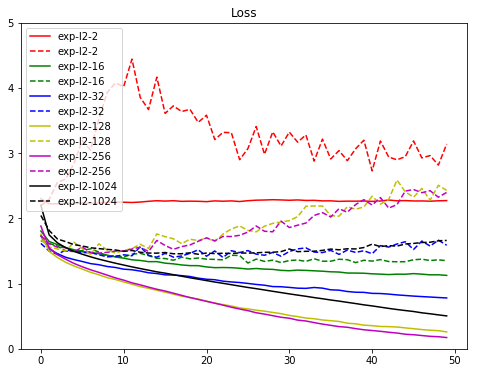

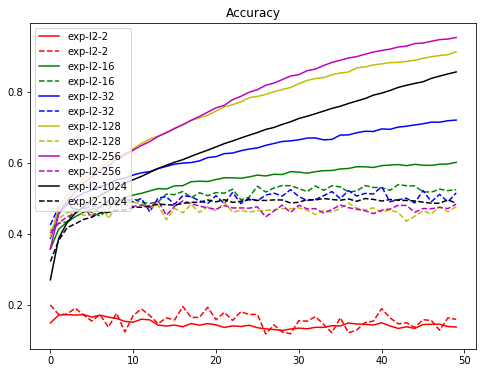

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()